In [1]:
from google.colab import drive
drive.mount('/content/drive/')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

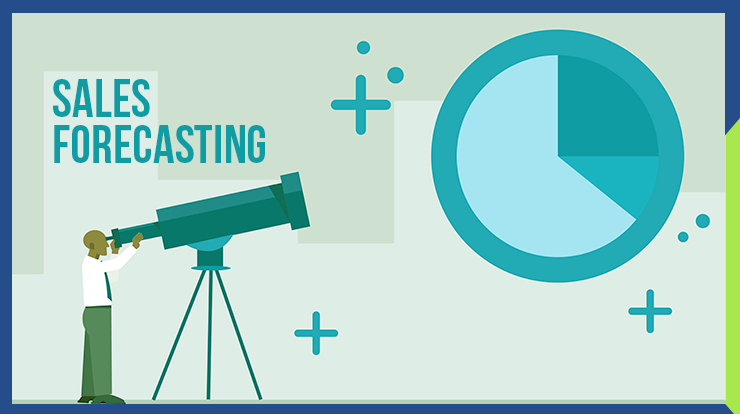

In [6]:
Image("Sales-Forecasting.png", width=800)

Sales forecasting is the process of estimating future sales. Accurate sales forecasts enable companies to make informed business decisions and predict short-term and long-term performance. Companies can base their forecasts on past sales data, industry-wide comparisons, and economic trends.

Sales forecasting gives insight into how a company should manage its workforce, cash flow, and resources. In addition to helping a company allocate its internal resources effectively, predictive sales data is important for businesses when looking to acquire investment capital.

Sales forecasting allows companies to:
Predict achievable sales revenue;

*   Predict achievable sales revenue
*   Efficiently allocate resources
*   Plan for future growth





# **Problem Description:**
Small Basket is a huge online / mobile application based grocery retailer in India,
founded in 2011. Small Basket is trying to manage its supply chain and delivery
partners and would like to accurately forecast the sales for the period starting
from 1st January 2019 to 15th January 2019.

Importing Libraries:

In [0]:
import pandas as pd          
import numpy as np           
import matplotlib.pyplot as plt  
from datetime import datetime    
from pandas import Series       
%matplotlib inline 
import warnings    

In [0]:
traintrans_data = pd.read_csv('/content/drive/My Drive/PHD/train_transactions.csv', header=0)

In [0]:
traintrans_data.shape

(71391, 3)

In [0]:
item_data = pd.read_csv("/content/drive/My Drive/PHD Exam/item_details.csv")
location_data = pd.read_csv("/content/drive/My Drive/PHD Exam/location_details.csv")

In [0]:
item_data.shape

(4100, 4)

In [0]:
location_data.shape

(54, 5)

In [0]:
train_data = pd.read_csv('/content/drive/My Drive/PHD Exam/train (1).csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
traintrans_data['date'] = pd.to_datetime(traintrans_data.date)

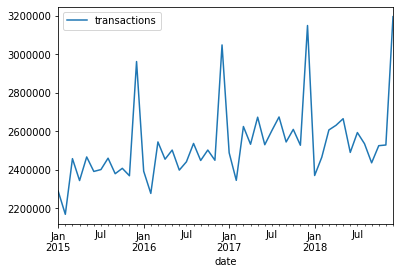

In [0]:
dg3 = traintrans_data.groupby(pd.Grouper(key='date', freq='1M')).sum()
dg3.plot()

**From this plot we can infer that there is an increasing trend in number of transactions.**

In [0]:
train_data.head()

,date,locationId,item_id,unit_sales,onpromotion
0,2015-01-01,location_25,item_103665,7.0,NaN
1,2015-01-01,location_25,item_105574,1.0,NaN
2,2015-01-01,location_25,item_105575,2.0,NaN
3,2015-01-01,location_25,item_108079,1.0,NaN
4,2015-01-01,location_25,item_108701,1.0,NaN


Merging Train and location dataset based on locationId.

In [0]:
train_location = pd.merge(train_data,location_data,left_on="locationId",right_on="location_id")

In [0]:
train_location.head()

,date,locationId,item_id,unit_sales,onpromotion,location_id,city,state,type,cluster
0,2015-01-01,location_25,item_103665,7.0,NaN,location_25,Kanpur,Uttar Pradesh,D,1
1,2015-01-01,location_25,item_105574,1.0,NaN,location_25,Kanpur,Uttar Pradesh,D,1
2,2015-01-01,location_25,item_105575,2.0,NaN,location_25,Kanpur,Uttar Pradesh,D,1
3,2015-01-01,location_25,item_108079,1.0,NaN,location_25,Kanpur,Uttar Pradesh,D,1
4,2015-01-01,location_25,item_108701,1.0,NaN,location_25,Kanpur,Uttar Pradesh,D,1


In [0]:
del train_location['location_id']

In [0]:
train_location.head()

,date,locationId,item_id,unit_sales,onpromotion,city,state,type,cluster
0,2015-01-01,location_25,item_103665,7.0,NaN,Kanpur,Uttar Pradesh,D,1
1,2015-01-01,location_25,item_105574,1.0,NaN,Kanpur,Uttar Pradesh,D,1
2,2015-01-01,location_25,item_105575,2.0,NaN,Kanpur,Uttar Pradesh,D,1
3,2015-01-01,location_25,item_108079,1.0,NaN,Kanpur,Uttar Pradesh,D,1
4,2015-01-01,location_25,item_108701,1.0,NaN,Kanpur,Uttar Pradesh,D,1


In [0]:
train_location.dtypes

date            object
locationId      object
item_id         object
unit_sales     float64
onpromotion     object
city            object
state           object
type            object
cluster          int64
dtype: object

In [0]:
train_location['locationId'] = train_location['locationId'].astype("category")
train_location['onpromotion'] = train_location['onpromotion'].astype("category")
train_location['city'] = train_location['city'].astype("category")
train_location['state'] = train_location['state'].astype("category")
train_location['type'] = train_location['type'].astype("category")
train_location['cluster'] = train_location['cluster'].astype("category")
train_location['item_id'] = train_location['item_id'].astype("category")

In [0]:
train_location.memory_usage(deep=True)

Index           813510232
date           6813148193
locationId      101694934
item_id         203808427
unit_sales      813510232
onpromotion     101688927
city            101690832
state           101690283
type            101689269
cluster         101689555
dtype: int64

In [0]:
train_location.dtypes

date             object
locationId     category
item_id        category
unit_sales      float64
onpromotion    category
city           category
state          category
type           category
cluster        category
dtype: object

In [0]:
train_location.to_pickle('./train_location.pkl')

In [0]:
train_loc1=pd.read_pickle('/content/train_location.pkl')

In [0]:
train_loc1.head()

,date,locationId,item_id,unit_sales,onpromotion,city,state,type,cluster
0,2015-01-01,location_25,item_103665,7.0,NaN,Kanpur,Uttar Pradesh,D,1
1,2015-01-01,location_25,item_105574,1.0,NaN,Kanpur,Uttar Pradesh,D,1
2,2015-01-01,location_25,item_105575,2.0,NaN,Kanpur,Uttar Pradesh,D,1
3,2015-01-01,location_25,item_108079,1.0,NaN,Kanpur,Uttar Pradesh,D,1
4,2015-01-01,location_25,item_108701,1.0,NaN,Kanpur,Uttar Pradesh,D,1


In [0]:
item_data.dtypes

item_id             object
category_of_item    object
class               object
perishable           int64
dtype: object

In [0]:
item_data['item_id'] = item_data['item_id'].astype("category")
item_data['category_of_item'] = item_data['category_of_item'].astype("category")
item_data['class'] = item_data['class'].astype("category")
item_data['perishable'] = item_data['perishable'].astype("category")

Merging train and location dataset with item details for gaining better insight.

In [0]:
train_loc_item = pd.merge(train_loc1,item_data,left_on="item_id",right_on="item_id")

In [0]:
train_loc_item.head()

,date,locationId,item_id,unit_sales,onpromotion,city,state,type,cluster,category_of_item,class,perishable
0,2015-01-01,location_25,item_103665,7.0,NaN,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
1,2015-01-02,location_25,item_103665,5.0,NaN,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
2,2015-01-04,location_25,item_103665,5.0,NaN,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
3,2015-01-05,location_25,item_103665,5.0,NaN,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
4,2015-01-06,location_25,item_103665,7.0,NaN,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1


In [0]:
train_loc_item.to_pickle('./train_loc_item.pkl')

In [0]:
data = pd.read_pickle('/content/drive/My Drive/PHD/train_loc_item.pkl')

In [0]:
data.shape

(101688779, 12)

In [0]:
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(5)

,Total,Percent
onpromotion,21657651,0.21298
perishable,0,0.00000
class,0,0.00000
category_of_item,0,0.00000
cluster,0,0.00000


In [0]:
data.onpromotion.value_counts(normalize=True)

False    0.936762
True     0.063238
Name: onpromotion, dtype: float64

In [0]:
from google.colab import files
from IPython.display import Image
uploaded = files.upload()

Saving Trend1.png to Trend1.png


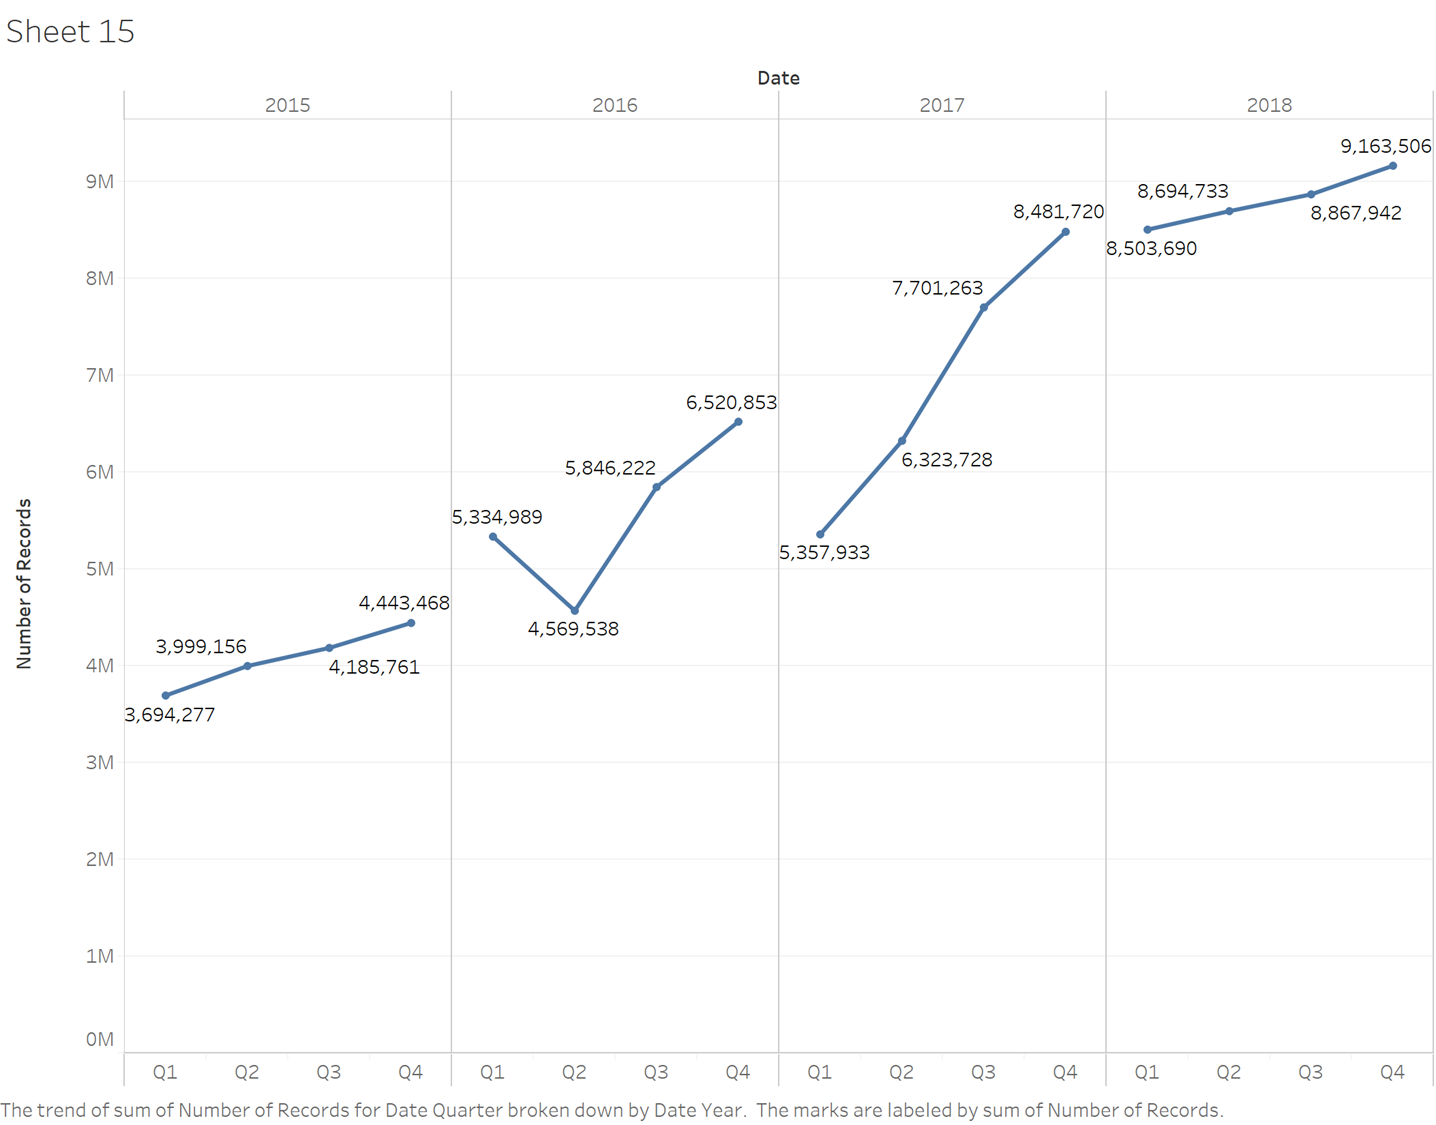

In [0]:
Image("Trend1.png", width=600)

From this plot we can infer unit sales is on increasing trend for every year and there is a drop in Q4 sales of 2016.

Since the data is large to handle, the dataset is considered from 2017 year for data analysis purpose.

In [0]:
data_filtered = data[data['date'] >= '2017-01-01']

In [0]:
data_filtered.shape

(63094515, 12)

In [0]:
data_filtered.head()

,date,locationId,item_id,unit_sales,onpromotion,city,state,type,cluster,category_of_item,class,perishable
548,2017-01-01,location_25,item_103665,12.0,False,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
549,2017-01-02,location_25,item_103665,31.0,False,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
550,2017-01-03,location_25,item_103665,10.0,False,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
551,2017-01-04,location_25,item_103665,5.0,False,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
552,2017-01-05,location_25,item_103665,9.0,False,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1


In [0]:
data_filtered.to_pickle('/content/drive/My Drive/PHD Exam/data_filtered.pkl')

In [0]:
data_two = pd.read_pickle("/content/drive/My Drive/PHD Exam/data_filtered.pkl")

In [0]:
data_two['date'] = pd.to_datetime(data_two.date)

In [0]:
data_two.dtypes

date                datetime64[ns]
locationId                category
item_id                     object
unit_sales                 float64
onpromotion               category
city                      category
state                     category
type                      category
cluster                   category
category_of_item          category
class                     category
perishable                category
dtype: object

In [0]:
data_two = data_two.sort_values(by='date')

In [0]:
data_two.head()

,date,locationId,item_id,unit_sales,onpromotion,city,state,type,cluster,category_of_item,class,perishable
548,2017-01-01,location_25,item_103665,12.0,False,Kanpur,Uttar Pradesh,D,1,baked_items / bread_based,class_2712,1
18754435,2017-01-01,location_25,item_838407,10.0,False,Kanpur,Uttar Pradesh,D,1,dairy_items,class_2124,1
42909862,2017-01-01,location_25,item_802831,33.0,False,Kanpur,Uttar Pradesh,D,1,grocery_items,class_1045,0
65994189,2017-01-01,location_25,item_1239740,5.0,False,Kanpur,Uttar Pradesh,D,1,dairy_items,class_2164,1
44836252,2017-01-01,location_25,item_269029,23.0,False,Kanpur,Uttar Pradesh,D,1,beverages,class_1122,0


In [0]:
data_two1 = data_two.reset_index(drop=True)

In [0]:
data_final = data_two1

In [0]:
#data_final.to_pickle('/content/drive/My Drive/PHD Exam/data_final.pkl')

In [0]:
data_final = pd.read_pickle('/content/drive/My Drive/PHD/data_final.pkl')

In [0]:
data_final.describe(include='category')

,locationId,item_id,onpromotion,city,state,type,cluster,category_of_item,class,perishable
count,63094515,63094515,63094515,63094515,63094515,63094515,63094515,63094515,63094515,63094515
unique,53,3887,2,22,13,5,17,30,328,2
top,location_44,item_314384,False,Bengaluru,Karnataka,D,6,grocery_items,class_1040,0
freq,1729921,37415,58492656,25871507,27173457,23473246,7184270,22413801,2329519,46939044


# **EDA**

Text(0.5, 0.98, '')

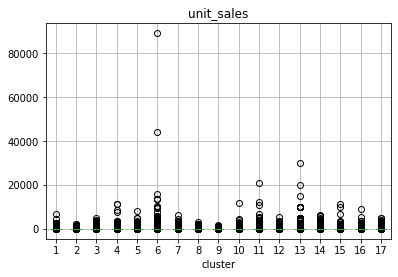

In [0]:
data_final.boxplot(column='unit_sales',by='cluster') 
plt.suptitle("")

The box plot helps us to infer that certain values are very high in range and it has to be handled. Values which are greater then 40000 for a particular item from a particular location are dropped.

In [0]:
data_final[data_final.unit_sales>=40000.0]

,date,locationId,item_id,unit_sales,onpromotion,city,state,type,cluster,category_of_item,class,perishable,Year,Month,Day
38327090,2018-04-21,location_20,item_841842,44142.0,False,Bengaluru,Karnataka,B,6,grocery_items,class_1072,0,2018,4,21
54590715,2018-10-07,location_39,item_1976284,89440.0,False,Hyderabad,Telangana,B,6,meat_based_items,class_2302,1,2018,10,7


In [0]:
data_final.shape

(63094515, 15)

In [0]:
data_final = data_final.drop(data_final[data_final.unit_sales > 44000].index)

In [0]:
data_final.shape

(63094513, 15)

Text(0.5, 0.98, '')

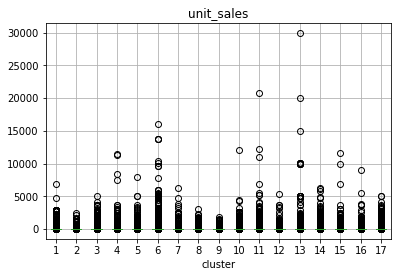

In [0]:
data_final.boxplot(column='unit_sales',by='cluster') 
plt.suptitle("")

**Unit Sales**

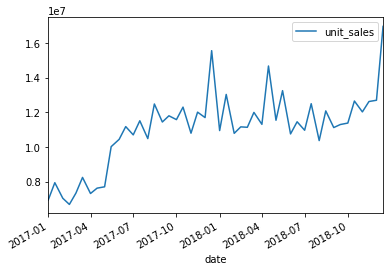

In [0]:
dg1 = data_final.groupby(pd.Grouper(key='date', freq='SMS')).sum()
dg1.plot()


From the above plot we can see that there is an increasing trend and this plot is on bi-monthly basis. The sales is high during December and low during the period of July and August.

**Daywise Sales**

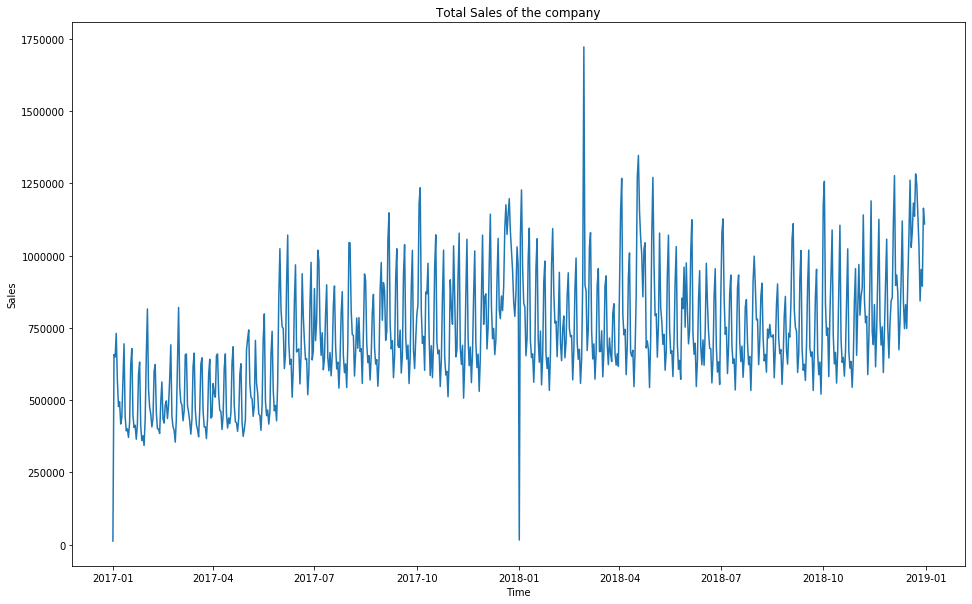

In [0]:
ts=data_final.groupby(["date"])["unit_sales"].sum()
ts.astype('float')
plt.figure(figsize=(16,10))
plt.title('Total Sales of the company')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.plot(ts);

**Cluster and Type**

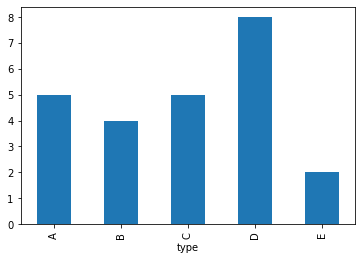

In [0]:
clust=pd.crosstab(data_final['cluster'],data_final['type']).nunique().plot.bar()
clust

From this plot we can infer Type D has more clusters.

**Category of Items and Perishable**

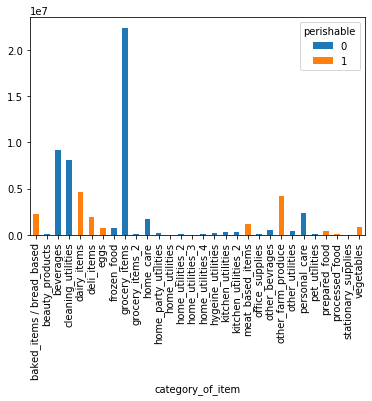

In [0]:
perish=pd.crosstab(data_final['category_of_item'],data_final['perishable']) 
perish.plot.bar(stacked =True)
plt.show()

We can infer that grocery_items are the most occuring one and also we can infer what are the perishable items and their occurance.

**Item, Category of Items and Unit Sales**

In [0]:
uploaded = files.upload()

Saving Itemwise Sales.png to Itemwise Sales.png


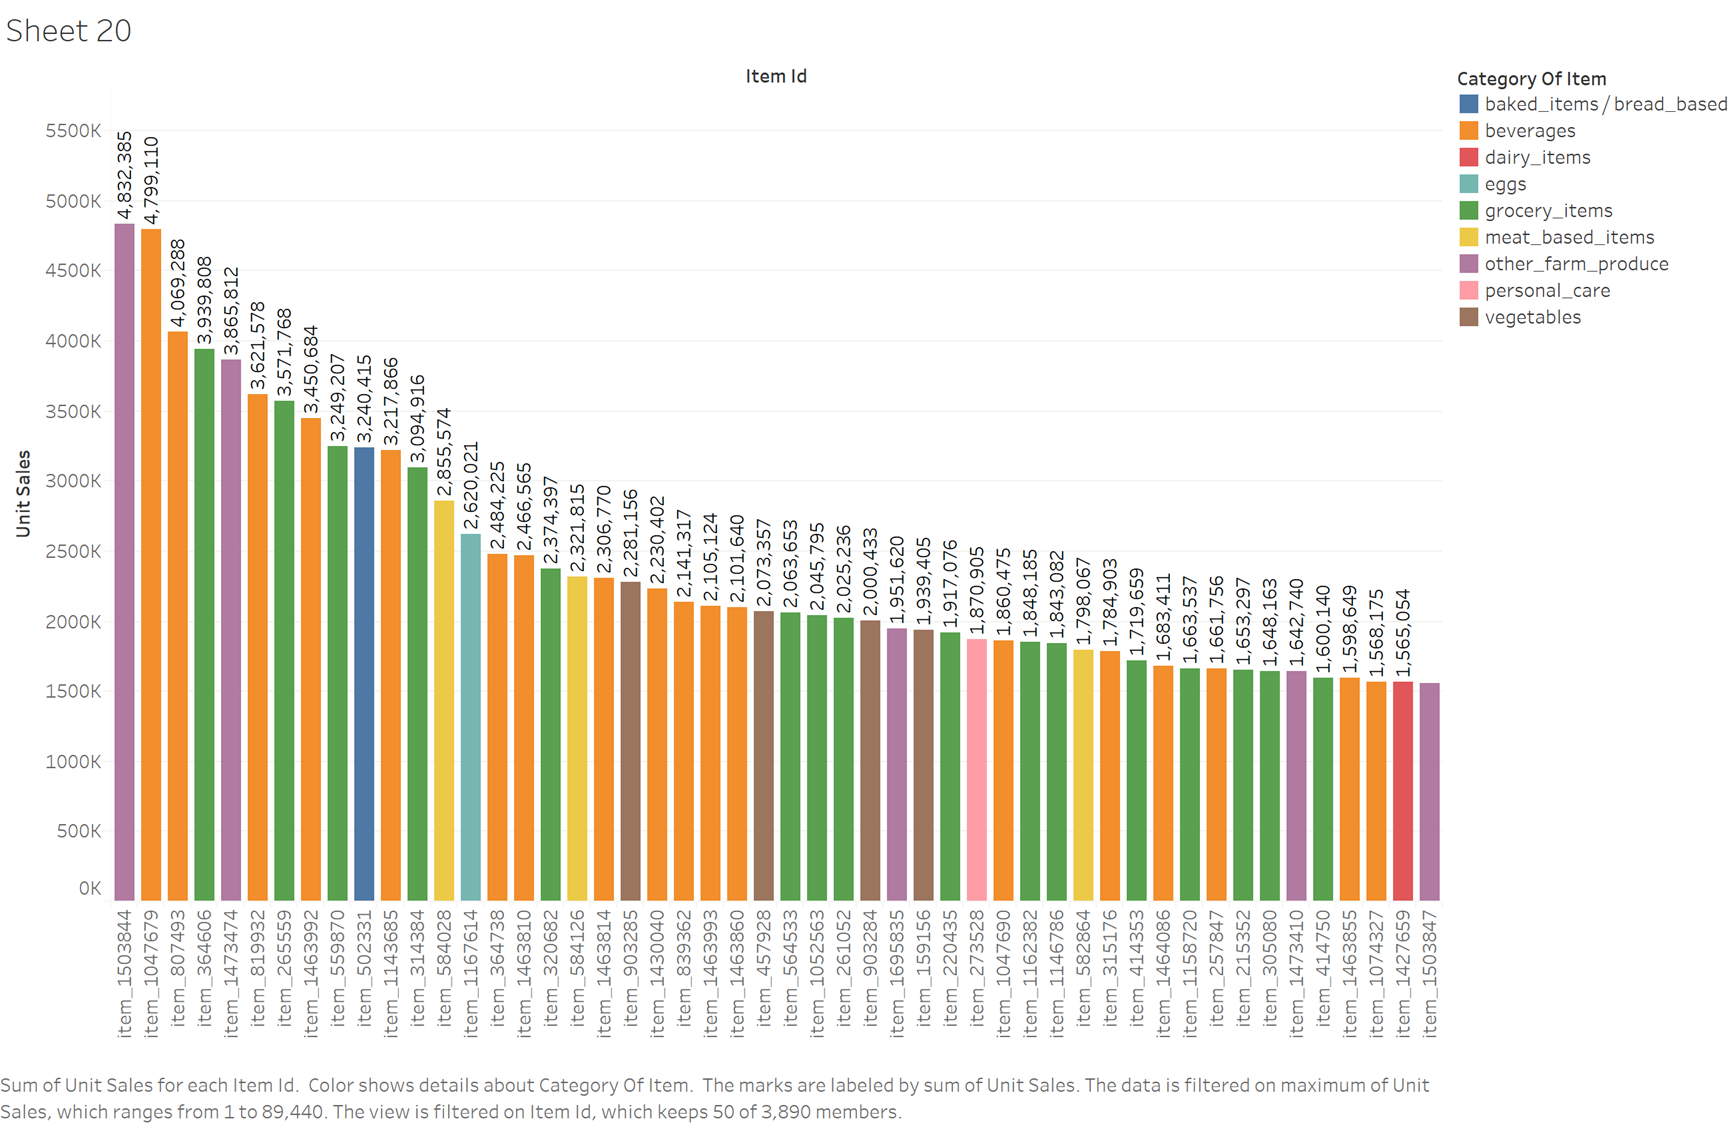

In [0]:
Image("Itemwise Sales.png", width=800)

From this plot we can infer what are the top selling items and the category to which those items belong.

**State and City Columns**

In [0]:
uploaded = files.upload()

Saving Picture4.png to Picture4.png


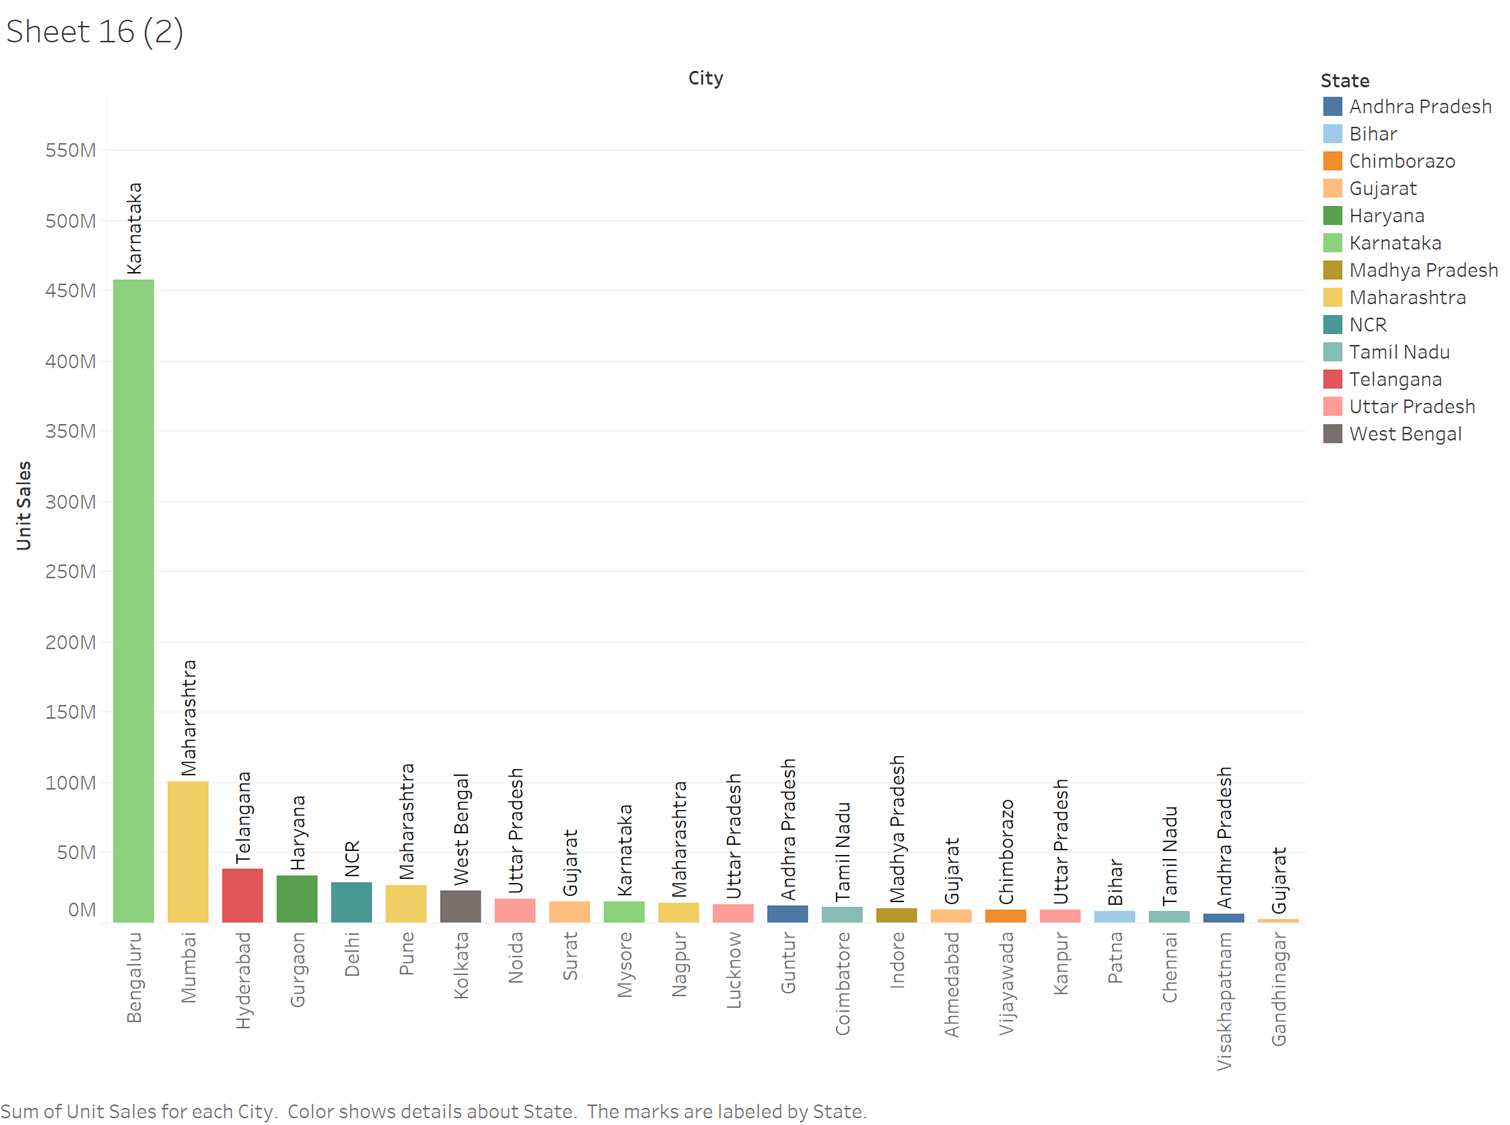

In [0]:
Image("Picture4.png", width=800)

From this plot we can infer that state Karnataka and Bangalore has highest number of sales followed by Maharashtra.

In [0]:
del data_final['Year']
del data_final['Month']
del data_final['Day']

**Perishable**

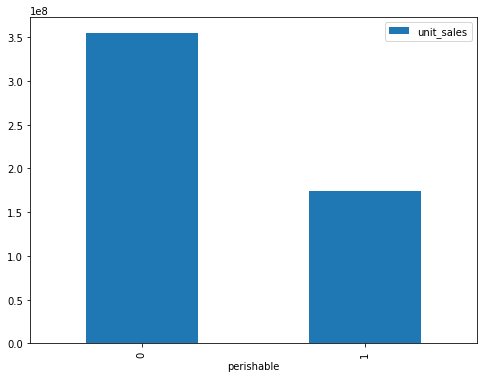

In [0]:
data_final.groupby(['perishable']).sum().plot(kind='bar',figsize=(8,6))

From this plot we can infer that there are more number of non-perishable items with more sales.

**Cluster**

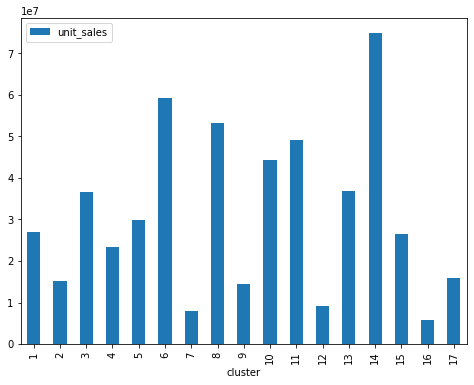

In [0]:
data_final.groupby(['cluster']).sum().plot(kind='bar',figsize=(8,6))

From this plot we can infer that cluster 14 is has more sales.

**Type and Unit Sales**

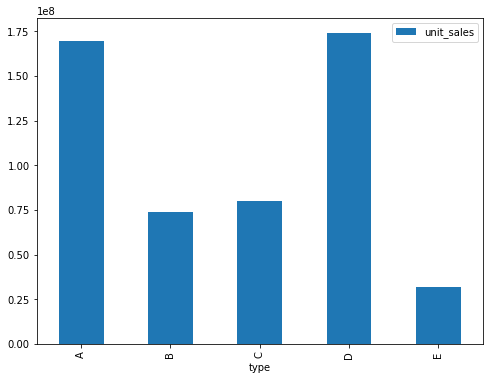

In [0]:
data_final.groupby(['type']).sum().plot(kind='bar',figsize=(8,6))

From the above plot we can infer that **Type D** has more sales followed by **Type A**.

**Location and Unit Sales**

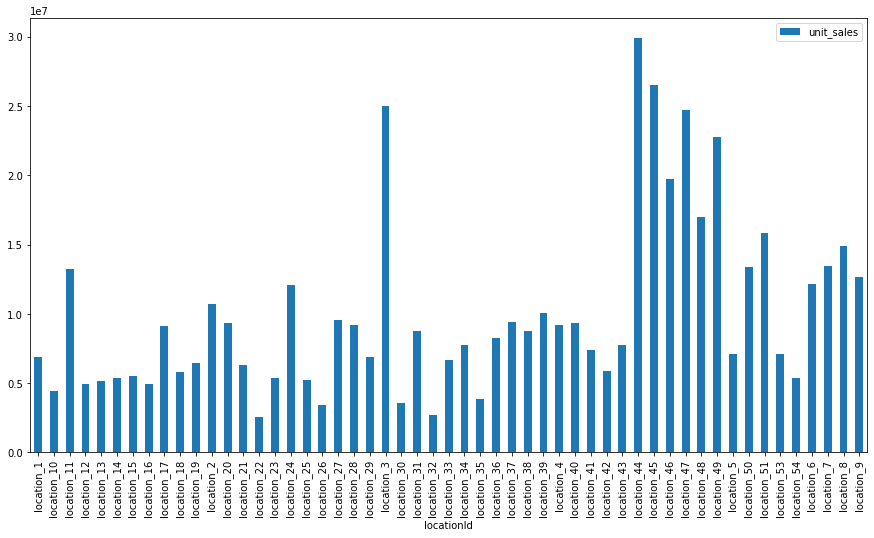

In [0]:
data_final.groupby(['locationId']).sum().plot(kind='bar',figsize=(15,8))

We can infer that location 44 has more unit sales when compared to other locations.

**Category of Item and Type**

In [0]:
uploaded = files.upload()

Saving pic.png to pic.png


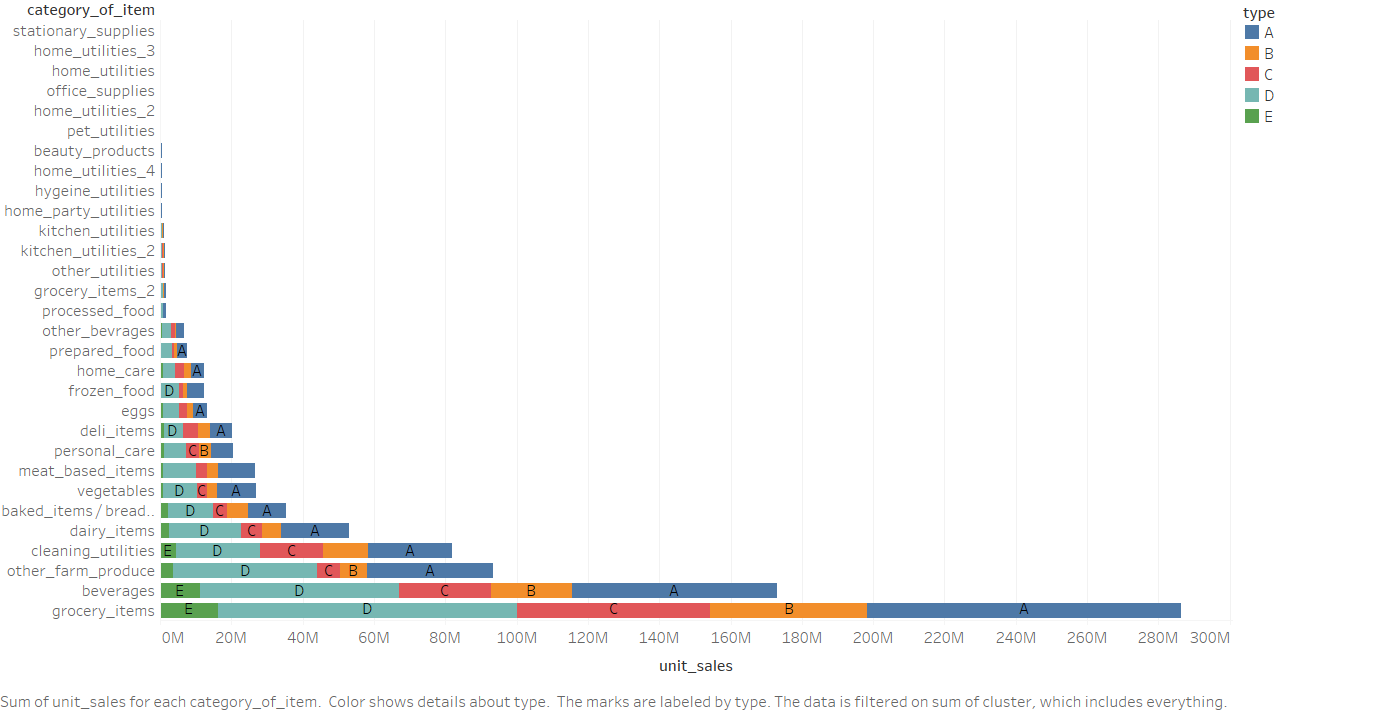

In [0]:
Image("pic.png", width=800)

From this plot we can infer that grocery_items are top selling category and the portion of sales from each type.

**Location and Type**

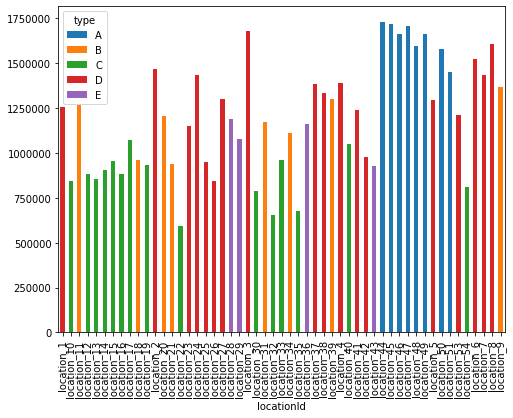

In [0]:
cluster=pd.crosstab(data_final['locationId'],data_final['type']) 
cluster.plot(kind="bar", stacked=True, figsize=(8,6))

We can infer from the above plot which location belongs to which Type and the plot shows Type D and Type A has more contribution.

**Data Preprocessing**

In [0]:
data_final = data_final.reset_index(drop=True)

In [0]:
#data_final['item_id'] = data_final['item_id'].astype("category")

In [0]:
data_final['Year'] = data_final['date'].dt.year
data_final['Month'] = data_final['date'].dt.month
data_final['Day'] = data_final['date'].dt.day

In [0]:
data_final.to_pickle('/content/drive/My Drive/PHD Exam/data_final.pkl')

In [0]:
data1 = pd.read_pickle('/content/drive/My Drive/PHD Exam/data_finalfiltered.pkl')

**Checking the unit sales with negative values.**

In [0]:
x=data_final[data_final.unit_sales<=0.0].count()
x

date                3865
locationId          3865
item_id             3865
unit_sales          3865
onpromotion         3865
city                3865
state               3865
type                3865
cluster             3865
category_of_item    3865
class               3865
perishable          3865
Year                3865
Month               3865
Day                 3865
dtype: int64

In [0]:
total_rows = len(data_final.unit_sales)
total_rows

63094513

In [0]:
percent_negvalues = (3865/total_rows)*100
percent_negvalues

0.0061257307747188735

It is inferred that only .006 percent have negative values and we are making those values to zero since sales cannot be negative.

In [0]:
data_final['unit_sales'] = np.where((data_final.unit_sales <= 0),0,data_final.unit_sales)

In [0]:
data_final[data_final.unit_sales<0.0]

,date,locationId,item_id,unit_sales,onpromotion,city,state,type,cluster,category_of_item,class,perishable,Year,Month,Day


In [0]:
data_final.to_pickle('/content/drive/My Drive/PHD/data_final.pkl')

In [0]:
data_final = pd.read_pickle('/content/drive/My Drive/PHD/data_final.pkl')

In [0]:
data_final.cluster.value_counts(normalize=True)

6     0.113865
14    0.103649
10    0.100872
3     0.092295
13    0.086510
8     0.074810
15    0.070758
4     0.061291
1     0.058368
11    0.053558
9     0.040182
2     0.037483
5     0.027418
7     0.023763
17    0.022974
12    0.016983
16    0.015222
Name: cluster, dtype: float64

In [0]:
data_final.category_of_item.value_counts(normalize=True)

grocery_items                0.355242
beverages                    0.145364
cleaning_utilities           0.128492
dairy_items                  0.072596
other_farm_produce           0.065716
personal_care                0.037226
baked_items / bread_based    0.035993
deli_items                   0.030707
home_care                    0.026844
meat_based_items             0.017622
vegetables                   0.013977
frozen_food                  0.011965
eggs                         0.011466
other_bevrages               0.008160
prepared_food                0.006045
other_utilities              0.005877
kitchen_utilities_2          0.005483
kitchen_utilities            0.004803
home_party_utilities         0.003336
hygeine_utilities            0.002471
home_utilities_4             0.002108
grocery_items_2              0.002021
processed_food               0.001931
beauty_products              0.001418
pet_utilities                0.001355
home_utilities_2             0.001001
office_suppl

Since certain categories are contributing more sales we are grouping the remaining less contributing categories to one category "other_items". 

In [0]:
data_final['category_of_item'] = data_final['category_of_item'].replace(['home_care','meat_based_items','vegetables','frozen_food','eggs','other_bevrages','prepared_food',
                                 'other_utilities','kitchen_utilities_2','kitchen_utilities','home_party_utilities','hygeine_utilities'
                                 'home_utilities_4','grocery_items_2','processed_food','beauty_products','pet_utilities'
                                 'home_utilities_2','office_supplies','home_utilities','home_utilities_3','stationary_supplies'], 'other_items')

In [0]:
data_final['category_of_item'] = data_final['category_of_item'].replace(['hygeine_utilities','home_utilities_4','pet_utilities','home_utilities_2'],'other_items')

In [0]:
data_final.category_of_item.value_counts(normalize=True)

grocery_items                0.355242
beverages                    0.145364
other_items                  0.128665
cleaning_utilities           0.128492
dairy_items                  0.072596
other_farm_produce           0.065716
personal_care                0.037226
baked_items / bread_based    0.035993
deli_items                   0.030707
Name: category_of_item, dtype: float64

In [0]:
data_final['category_of_item'] = data_final['category_of_item'].astype('category')

In [0]:
data_final.describe(include='category')

,locationId,item_id,onpromotion,city,state,type,cluster,category_of_item,class,perishable
count,63094513,63094513,63094513,63094513,63094513,63094513,63094513,63094513,63094513,63094513
unique,53,3887,2,22,13,5,17,9,328,2
top,location_44,item_314384,False,Bengaluru,Karnataka,D,6,grocery_items,class_1040,0
freq,1729921,37415,58492654,25871506,27173456,23473246,7184268,22413800,2329519,46939043


In [0]:
x=data_final["date"].drop_duplicates()

In [0]:
x.tail(10)

62012109   2018-12-21
62119874   2018-12-22
62226412   2018-12-23
62336860   2018-12-24
62448149   2018-12-26
62556501   2018-12-27
62660629   2018-12-28
62767465   2018-12-29
62873416   2018-12-30
62984217   2018-12-31
Name: date, dtype: datetime64[ns]

It is inferred that December 25 is Holiday.

In [0]:
data_final.perishable.value_counts(normalize=True)

0    0.743948
1    0.256052
Name: perishable, dtype: float64

In [0]:
data_final.to_pickle('./data_final.pkl')

In [0]:
data_final = pd.read_pickle('/content/drive/My Drive/PHD/data_final.pkl')

# Initial Model Building:

**PCA and Model Building:**

In [0]:
data1 = pd.read_pickle('/content/drive/My Drive/PHD/data_final.pkl')

PCA is done for one year data to reduce the computational complexity.

In [0]:
data1 = data1[data1['date'] >= '2018-01-01']

In [0]:
data1.head()

,date,locationId,item_id,unit_sales,onpromotion,city,state,type,cluster,category_of_item,class,perishable,Year,Month,Day
27864644,2018-01-01,location_25,item_1178697,2.000,False,Kanpur,Uttar Pradesh,D,1,cleaning_utilities,class_3020,0,2018,1,1
27864645,2018-01-01,location_25,item_1473474,123.054,False,Kanpur,Uttar Pradesh,D,1,other_farm_produce,class_2014,1,2018,1,1
27864646,2018-01-01,location_25,item_916885,9.000,False,Kanpur,Uttar Pradesh,D,1,cleaning_utilities,class_3024,0,2018,1,1
27864647,2018-01-01,location_25,item_732007,1.000,True,Kanpur,Uttar Pradesh,D,1,deli_items,class_2642,1,2018,1,1
27864648,2018-01-01,location_25,item_816679,5.963,True,Kanpur,Uttar Pradesh,D,1,meat_based_items,class_2302,1,2018,1,1


In [0]:
data1.dtypes

date                datetime64[ns]
locationId                category
item_id                   category
unit_sales                 float64
onpromotion               category
city                      category
state                     category
type                      category
cluster                   category
category_of_item          category
class                     category
perishable                category
Year                         int64
Month                        int64
Day                          int64
dtype: object

In [0]:
data1['date']=data1['date'].dt.dayofweek

In [0]:
data1.head(2)

,date,locationId,item_id,unit_sales,onpromotion,city,state,type,cluster,category_of_item,class,perishable,Year,Month,Day
27864644,0,location_25,item_1178697,2.000,False,Kanpur,Uttar Pradesh,D,1,cleaning_utilities,class_3020,0,2018,1,1
27864645,0,location_25,item_1473474,123.054,False,Kanpur,Uttar Pradesh,D,1,other_farm_produce,class_2014,1,2018,1,1


In [0]:
data1 = data1.reset_index(drop=True)

In [0]:
data1 = data1.drop(data1[data1.unit_sales > 44000].index)

In [0]:
data1['unit_sales'] = np.where((data1.unit_sales <= 0),0,data1.unit_sales)

In [0]:
data1.shape

(35229869, 15)

Reducing the levels of category items

In [0]:
data1['category_of_item'] = data1['category_of_item'].replace(['home_care','meat_based_items','vegetables','frozen_food','eggs','other_bevrages','prepared_food',
                                 'other_utilities','kitchen_utilities_2','kitchen_utilities','home_party_utilities','hygeine_utilities'
                                 'home_utilities_4','grocery_items_2','processed_food','beauty_products','pet_utilities'
                                 'home_utilities_2','office_supplies','home_utilities','home_utilities_3','stationary_supplies'], 'other_items')

In [0]:
data1['category_of_item'] = data1['category_of_item'].replace(['hygeine_utilities','home_utilities_4','pet_utilities','home_utilities_2'],'other_items')

In [0]:
data1.dtypes

date                   int64
locationId          category
item_id             category
unit_sales           float64
onpromotion         category
city                category
state               category
type                category
cluster             category
category_of_item      object
class               category
perishable          category
Year                   int64
Month                  int64
Day                    int64
dtype: object

In [0]:
def df_lbl_enc(df):
    for c in df.columns:
        if df[c].dtype == 'object':
            lbl = preprocessing.LabelEncoder()
            df[c] = lbl.fit_transform(df[c])
            print(c)
    return df

In [0]:
data1['locationId'] = data1['locationId'].astype('object')
data1['item_id'] = data1['item_id'].astype('object')
data1['class'] = data1['class'].astype('object')

In [0]:
data1['category_of_item'] = data1['category_of_item'].astype('category')

In [0]:
data1.head()

,date,locationId,item_id,unit_sales,onpromotion,city,state,type,cluster,category_of_item,class,perishable,Year,Month,Day
0,0,location_25,item_1178697,2.000,False,Kanpur,Uttar Pradesh,D,1,cleaning_utilities,class_3020,0,2018,1,1
1,0,location_25,item_1473474,123.054,False,Kanpur,Uttar Pradesh,D,1,other_farm_produce,class_2014,1,2018,1,1
2,0,location_25,item_916885,9.000,False,Kanpur,Uttar Pradesh,D,1,cleaning_utilities,class_3024,0,2018,1,1
3,0,location_25,item_732007,1.000,True,Kanpur,Uttar Pradesh,D,1,deli_items,class_2642,1,2018,1,1
4,0,location_25,item_816679,5.963,True,Kanpur,Uttar Pradesh,D,1,other_items,class_2302,1,2018,1,1


In [0]:
from sklearn import preprocessing, linear_model, model_selection

In [0]:
data1 = df_lbl_enc(data1)

locationId
item_id
class


In [0]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35229869 entries, 0 to 35229868
Data columns (total 15 columns):
date                int64
locationId          int64
item_id             int64
unit_sales          float64
onpromotion         category
city                category
state               category
type                category
cluster             category
category_of_item    category
class               int64
perishable          category
Year                int64
Month               int64
Day                 int64
dtypes: category(7), float64(1), int64(7)
memory usage: 2.6 GB


In [0]:
data1['date'] = data1['date'].astype('int8')
data1['locationId'] = data1['locationId'].astype('int8')
data1['item_id'] = data1['item_id'].astype('int16')
data1['class'] = data1['class'].astype('int16')
data1['Year'] = data1['Year'].astype('int8')
data1['Month'] = data1['Month'].astype('int8')
data1['Day'] = data1['Day'].astype('int8')
data1['unit_sales'] = data1['unit_sales'].astype('float32')

In [0]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35229869 entries, 0 to 35229868
Data columns (total 15 columns):
date                int8
locationId          int8
item_id             int16
unit_sales          float32
onpromotion         category
city                category
state               category
type                category
cluster             category
category_of_item    category
class               int16
perishable          category
Year                int8
Month               int8
Day                 int8
dtypes: category(7), float32(1), int16(2), int8(5)
memory usage: 940.7 MB


In [0]:
data1.shape

(35229869, 15)

In [0]:
num_attr= data1.select_dtypes(['int8','float32']).columns
print(num_attr)

Index(['date', 'locationId', 'unit_sales', 'Year', 'Month', 'Day'], dtype='object')


Selecting Category Columns

In [0]:
cat_attr= data2.select_dtypes(['category']).columns
print(cat_attr)

Index(['onpromotion', 'type', 'cluster', 'category_of_item', 'perishable'], dtype='object')


In [0]:
data1.describe(include='category')

,onpromotion,city,state,type,cluster,category_of_item,perishable
count,35229869,35229869,35229869,35229869,35229869,35229869,35229869
unique,2,22,13,5,17,9,2
top,False,Bengaluru,Karnataka,D,6,grocery_items,0
freq,31715285,14264545,14981911,13076977,4120424,12325147,26124718


In [0]:
data2 = data1

In [0]:
del data2['city']
del data2['state']

In [0]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35229869 entries, 0 to 35229868
Data columns (total 13 columns):
date                int8
locationId          int8
item_id             int16
unit_sales          float32
onpromotion         category
type                category
cluster             category
category_of_item    category
class               int16
perishable          category
Year                int8
Month               int8
Day                 int8
dtypes: category(5), float32(1), int16(2), int8(5)
memory usage: 873.5 MB


In [0]:
data2.to_pickle('./data2.pkl')

**PCA**

PCA is done to reduce the dimensionality since the unique levels of each categorical variables are high. After doing PCA these PCA components will be merged with the dataframe for model building. The variables whose dimensions are to be reduced are brought into a new dataframe for doing PCA. Initally the variables are dummified and the dummified variables are scaled before applying PCA.

In [0]:
data3 = data2.drop(['type','cluster','category_of_item','perishable','Year'],axis=1)

In [0]:
datapca1 = pd.get_dummies(columns=cat_attr,data=data2,drop_first=False)

In [0]:
datapca1.head()

,date,locationId,item_id,unit_sales,class,Year,Month,Day,onpromotion_False,onpromotion_True,type_A,type_B,type_C,type_D,type_E,cluster_1,cluster_2,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10,cluster_11,cluster_12,cluster_13,cluster_14,cluster_15,cluster_16,cluster_17,category_of_item_baked_items / bread_based,category_of_item_beverages,category_of_item_cleaning_utilities,category_of_item_dairy_items,category_of_item_deli_items,category_of_item_grocery_items,category_of_item_other_farm_produce,category_of_item_other_items,category_of_item_personal_care,perishable_0,perishable_1
0,0,17,467,2.000000,216,-30,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,17,1426,123.054001,106,-30,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
2,0,17,3763,9.000000,218,-30,1,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,0,17,3405,1.000000,167,-30,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,0,17,3528,5.963000,152,-30,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [0]:
del datapca1['Year']

In [0]:
datapca1.shape

(35229869, 42)

In [0]:
datapca2 = datapca1.drop(['date','locationId','item_id','unit_sales','class','Month','Day'],axis=1)

In [0]:
datapca2.shape

(35229869, 35)

In [0]:
datapca2.to_pickle('./datapca2.pkl')

In [0]:
datapca2 = pd.read_pickle('/content/datapca2.pkl')

In [0]:
datapca2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35229869 entries, 0 to 35229868
Data columns (total 35 columns):
onpromotion_False                             uint8
onpromotion_True                              uint8
type_A                                        uint8
type_B                                        uint8
type_C                                        uint8
type_D                                        uint8
type_E                                        uint8
cluster_1                                     uint8
cluster_2                                     uint8
cluster_3                                     uint8
cluster_4                                     uint8
cluster_5                                     uint8
cluster_6                                     uint8
cluster_7                                     uint8
cluster_8                                     uint8
cluster_9                                     uint8
cluster_10                                    uint8
c

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()   # Instantiating the scaler object

In [0]:
pca_x = scaler.fit_transform(datapca2)   # Transforming the columns.

In [0]:
pca_x = pd.DataFrame(data=pca_x,columns=pca_x.dtype.names)

In [0]:
pca_x = pca_x.astype('float16')

In [0]:
pca_x.to_pickle('./pca_x')

**PCA**

In [0]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

In [0]:
principal_components = pca.fit_transform(pca_x)

In [0]:
new_X = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10'])


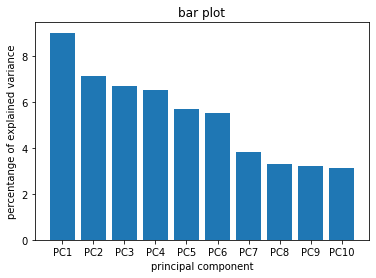

In [0]:
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('percentange of explained variance')
plt.xlabel('principal component')
plt.title('bar plot')
plt.show()

In [0]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[3.13627316 2.49286362 2.33570508 2.27862447 1.9812165  1.92555943
 1.32773216 1.15880642 1.12124278 1.08499577]
[0.08960429 0.07122188 0.06673181 0.065101   0.05660396 0.05501382
 0.03793371 0.03310745 0.03203425 0.03099866]
[0.08960429 0.16082616 0.22755797 0.29265897 0.34926294 0.40427676
 0.44221047 0.47531793 0.50735218 0.53835084]


In [0]:
train_data = pd.concat([data3,new_X], axis=1)  # Concatenating the PCA components with the existing dataframe

In [0]:
train_data.head()

,date,locationId,item_id,unit_sales,onpromotion,class,Month,Day,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0,17,467,2.000000,False,216,1,1,-0.550202,-2.167557,-0.318670,-0.250482,-0.290458,-0.022733,1.131822,-1.839143,-1.497847,-0.040470
1,0,17,1426,123.054001,False,106,1,1,3.331433,-1.584941,0.118924,-0.263718,-0.522984,-0.750612,-0.226069,0.304521,-0.995904,0.553576
2,0,17,3763,9.000000,False,218,1,1,-0.550202,-2.167557,-0.318670,-0.250482,-0.290458,-0.022733,1.131822,-1.839143,-1.497847,-0.040470
3,0,17,3405,1.000000,True,167,1,1,4.092223,-0.719800,1.558174,0.108549,0.722081,3.699423,0.074934,0.292836,-0.372354,-0.901726
4,0,17,3528,5.963000,True,152,1,1,3.371388,-1.078253,1.022031,-0.020314,0.700351,3.611880,0.371435,-0.837646,1.980135,-0.112793


**Train - Validation Split**

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = train_data
Y = train_data['unit_sales']
X = X.drop(['unit_sales'],axis=1)

In [0]:
X_train,X_val,Y_train,Y_val = train_test_split(X,Y,test_size=0.30,random_state=123)   # Train Test split

In [0]:
print(X_val.shape)
print(Y_val.shape)

(10568961, 17)
(10568961,)


In [0]:
train_data.to_pickle('./train_data.pkl')

**Model Building:**

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lr_model = LinearRegression()
lr_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
y_val_pred = lr_model.predict(X_val)

In [0]:
y_trainpred = lr_model.predict(X_train)

In [0]:
from sklearn.metrics import mean_absolute_error

In [0]:
mean_absolute_error(Y_train,y_trainpred)

7.161860570949956

In [0]:
mean_absolute_error(Y_val,y_val_pred)

7.167744795758798

Since the errors are high prediction on test is not done.